***
# Exploratory Data Analysis and Visualization
***
by  `Jonathan Molina` <br>
In this notebook we explore in detail an animal research dataset.

## Import Libraries

##### First we need to import all necessary libraries.

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer

## Load DataSet 

We proceed to load the data set.

In [2]:
animalsDf= pd.read_csv('./IslandPenguinDataSet.csv')
animalsDf.head() #using .head() and tail() we observe and corroborate the data.

,Species Name,Island of Origin,Bill Length,Bill Depth,Flipper Length,Corporal Mass,Sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [3]:
animalsDf.tail()

,Species Name,Island of Origin,Bill Length,Bill Depth,Flipper Length,Corporal Mass,Sex
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE
343,Gentoo,Biscoe,49.9,16.1,213.0,5400.0,MALE


## Initial data cleaning and exploration.
We get a sense of the data by using .shape, .columns, .info.

In [4]:
animalsDf.shape #Using .shape we return the demensions of the data sets in the form: (rows, columns)

(344, 7)

In [5]:
animalsDf.columns #Using Columns we return the names of columns

Index(['Species Name', 'Island of Origin', 'Bill Length', 'Bill Depth',
       'Flipper Length', 'Corporal Mass', 'Sex'],
      dtype='object')

In [6]:
animalsDf.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
Species Name        344 non-null object
Island of Origin    344 non-null object
Bill Length         342 non-null float64
Bill Depth          342 non-null float64
Flipper Length      342 non-null float64
Corporal Mass       342 non-null float64
Sex                 333 non-null object
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


### Clean DataSet

In order to analyze the dataset, we proceed to eliminate all unnecessary values and the "clean" the data.

In [7]:
animalsDf.isnull().sum()

Species Name         0
Island of Origin     0
Bill Length          2
Bill Depth           2
Flipper Length       2
Corporal Mass        2
Sex                 11
dtype: int64

In [8]:
imputer = SimpleImputer(strategy="most_frequent")
animalsDf.iloc[:, :] = imputer.fit_transform(animalsDf)
# ensuring that there are no more null values left
animalsDf.isnull().sum()

Species Name        0
Island of Origin    0
Bill Length         0
Bill Depth          0
Flipper Length      0
Corporal Mass       0
Sex                 0
dtype: int64

###### We must make sure that the deadta is clean in order to correctly analyze it.

## Analysis of Data

### Data Preparation and Exploration
In this section we explore the data.

In [9]:
animalsDf.describe() #We obtain the mean, maximun value, minumun value, standard deviation, etc of all the rows.

,Bill Length,Bill Depth,Flipper Length,Corporal Mass
count,344.000000,344.000000,344.000000,344.000000
mean,43.905523,17.150291,200.851744,4199.418605
std,5.447882,1.969061,14.045266,800.197923
min,32.100000,13.100000,172.000000,2700.000000
25%,39.275000,15.600000,190.000000,3550.000000
50%,44.250000,17.300000,197.000000,4025.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


### Creation of tables
#### Island of Origin/Species Count

In [10]:
islandDf = pd.DataFrame(animalsDf.groupby(["Island of Origin", "Species Name"])["Island of Origin"].count()).rename(columns={"Island of Origin": "Count"})
islandDf

Count
Island of Origin Species Name       
Biscoe           Adelie           44
                 Gentoo          124
Dream            Adelie           56
                 Chinstrap        68
Torgersen        Adelie           52

#### Adelie Species Table

In [11]:
adelieSpeciesDf = animalsDf[animalsDf["Species Name"] == "Adelie"].reset_index(drop=True)
adelieSpeciesDf.head()

,Species Name,Island of Origin,Bill Length,Bill Depth,Flipper Length,Corporal Mass,Sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,41.1,17.0,190.0,3800.0,MALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


#### Chinstrap Species Table

In [12]:
chinstrapSpeciesDf = animalsDf[animalsDf["Species Name"] == "Chinstrap"].reset_index(drop=True)
chinstrapSpeciesDf.head()

,Species Name,Island of Origin,Bill Length,Bill Depth,Flipper Length,Corporal Mass,Sex
0,Chinstrap,Dream,46.5,17.9,192.0,3500.0,FEMALE
1,Chinstrap,Dream,50.0,19.5,196.0,3900.0,MALE
2,Chinstrap,Dream,51.3,19.2,193.0,3650.0,MALE
3,Chinstrap,Dream,45.4,18.7,188.0,3525.0,FEMALE
4,Chinstrap,Dream,52.7,19.8,197.0,3725.0,MALE


#### Gentoo Species Table

In [13]:
gentooSpeciesDf = animalsDf[animalsDf["Species Name"] == "Gentoo"].reset_index(drop=True)
gentooSpeciesDf.head()

,Species Name,Island of Origin,Bill Length,Bill Depth,Flipper Length,Corporal Mass,Sex
0,Gentoo,Biscoe,46.1,13.2,211.0,4500.0,FEMALE
1,Gentoo,Biscoe,50.0,16.3,230.0,5700.0,MALE
2,Gentoo,Biscoe,48.7,14.1,210.0,4450.0,FEMALE
3,Gentoo,Biscoe,50.0,15.2,218.0,5700.0,MALE
4,Gentoo,Biscoe,47.6,14.5,215.0,5400.0,MALE


#### Animal Gender Table

In [14]:
male = (pd.DataFrame(animalsDf[animalsDf["Sex"] == "MALE"][["Species Name", "Sex"]].groupby("Species Name")["Sex"].count()).sort_values("Sex", ascending=False).reset_index().rename(columns={"Sex": "Male"}))
female = (pd.DataFrame(animalsDf[animalsDf["Sex"] == "FEMALE"][["Species Name", "Sex"]].groupby("Species Name")["Sex"].count()).sort_values("Sex", ascending=False).reset_index().rename(columns={"Sex": "Female"}))
speciesSex = male
speciesSex["Female"] = female["Female"]
speciesSex

,Species Name,Male,Female
0,Adelie,79,73
1,Gentoo,66,58
2,Chinstrap,34,34


### Basic Plots
#### Bar Plots of Population vs Gender

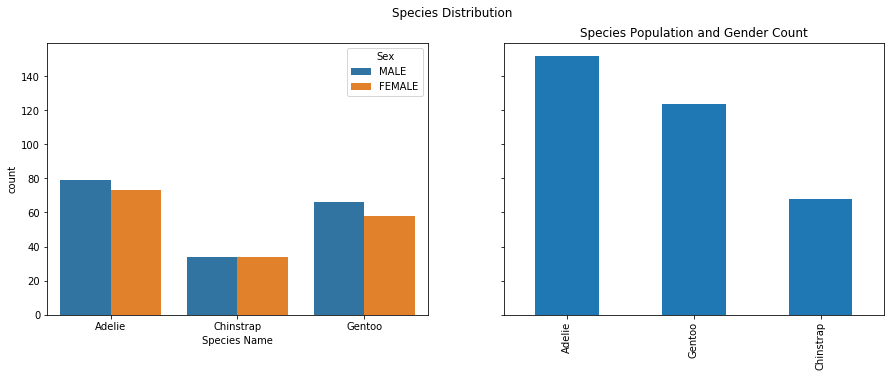

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Species Distribution')
sns.countplot(data=animalsDf, x='Species Name', hue='Sex', ax=ax[0])
ax[1] = animalsDf['Species Name'].value_counts().plot(kind='bar', figsize=(15,5), title="Species Population and Gender Count")

###### **Figure 1.** Bar Plots of Population vs Gender and species.

#### Distribution Plots

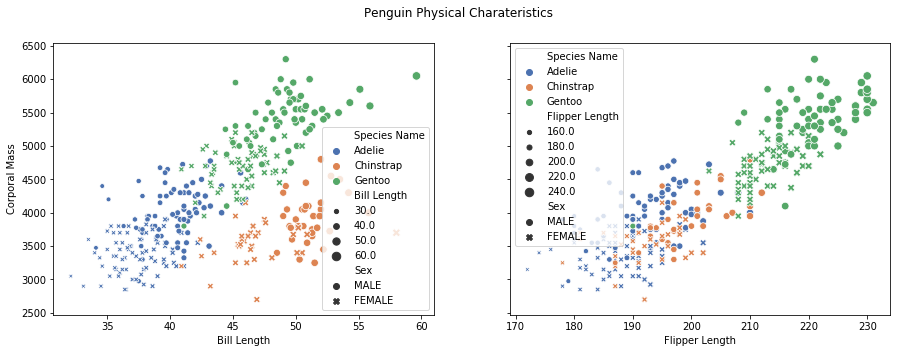

In [16]:
fig, ax1 = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Penguin Physical Charateristics')
sns.scatterplot(data=animalsDf, x= "Bill Length", y="Corporal Mass", hue="Species Name", size="Bill Length", style="Sex", ax = ax1[0], palette="deep")
sns.scatterplot(data=animalsDf, x= "Flipper Length", y="Corporal Mass", hue="Species Name", size="Flipper Length", style="Sex", ax = ax1[1], palette="deep")

###### **Figure 2.** Distribution of Penguin Physical Characteristics; Corporal Mass vs Bill Length and Flipper Length.

### Advanced Plots
PairPlot; flexible pairwise relationships in a dataset.

<Figure size 1440x1440 with 0 Axes>

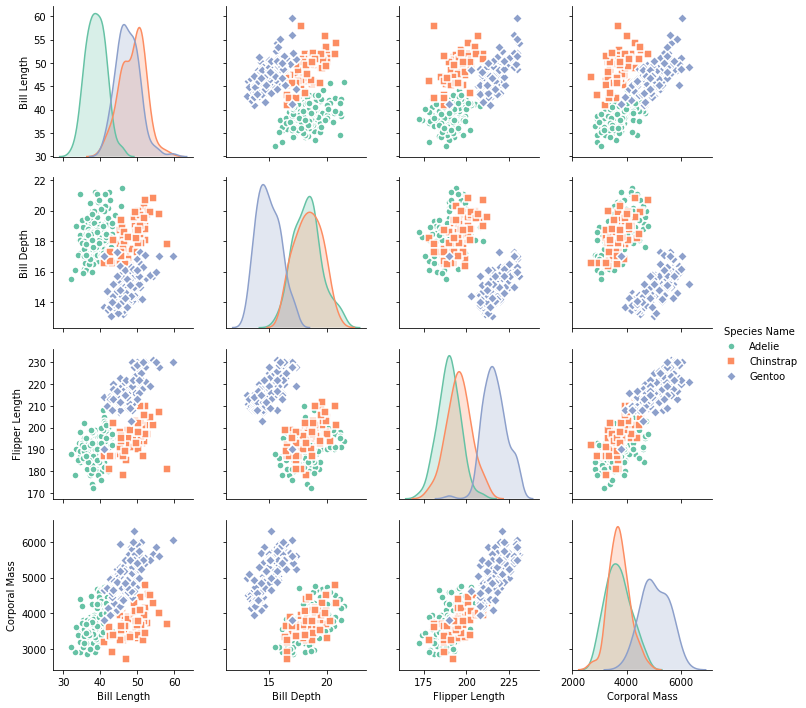

In [17]:
plt.figure(figsize=(20,20))
sns.pairplot(animalsDf, kind="scatter", hue="Species Name", markers=["o", "s", "D"],palette="Set2", plot_kws=dict(s=50, edgecolor="white", linewidth=1.5))
plt.show()


###### **Figure 3.** Pair Plot Graph.

#### FacetGrid
Multi-plot grid for plotting conditional relationships.

<Figure size 1080x360 with 0 Axes>

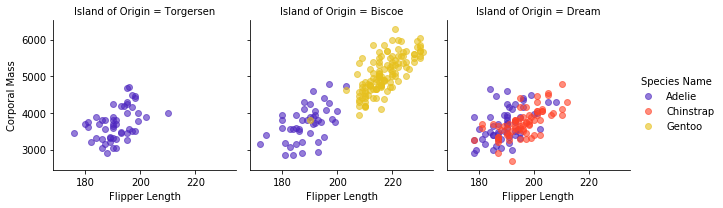

In [18]:
plt.figure(figsize=(15,5))
g = sns.FacetGrid(animalsDf, col="Island of Origin", hue="Species Name", palette= "CMRmap")
g.map(plt.scatter, "Flipper Length", "Corporal Mass", alpha=.6)
g.add_legend()
plt.show()

###### **Figure 4.** Distribution of Penguin Island of origin vs flipper length.

#### Stripplot and Swarmplot

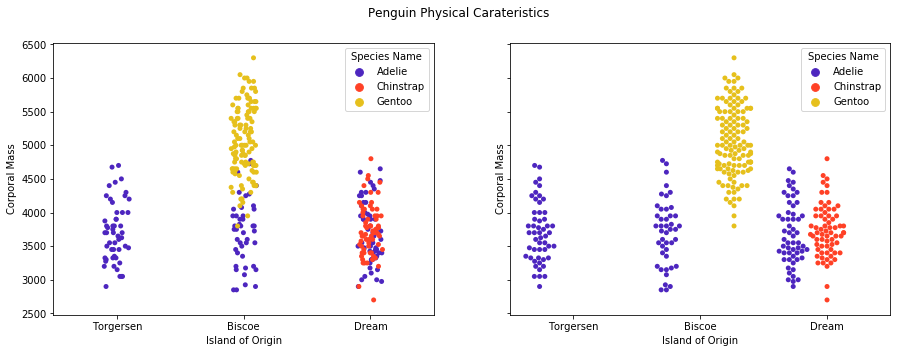

In [19]:
fig, ax2 = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Penguin Physical Carateristics')
sns.stripplot(x="Island of Origin", y="Corporal Mass", hue= "Species Name", data=animalsDf, ax = ax2[0], palette="CMRmap")
sns.swarmplot(x="Island of Origin", y="Corporal Mass", hue="Species Name",data=animalsDf, ax = ax2[1], palette="CMRmap", dodge=True)

###### **Figure 5.** Distribution of penguin Island of origin vs corporal mass.

#### lmplot
This function combines regplot() and FacetGrid. It is intended as a convenient interface to fit regression models across conditional subsets of a dataset.

<Figure size 1440x1440 with 0 Axes>

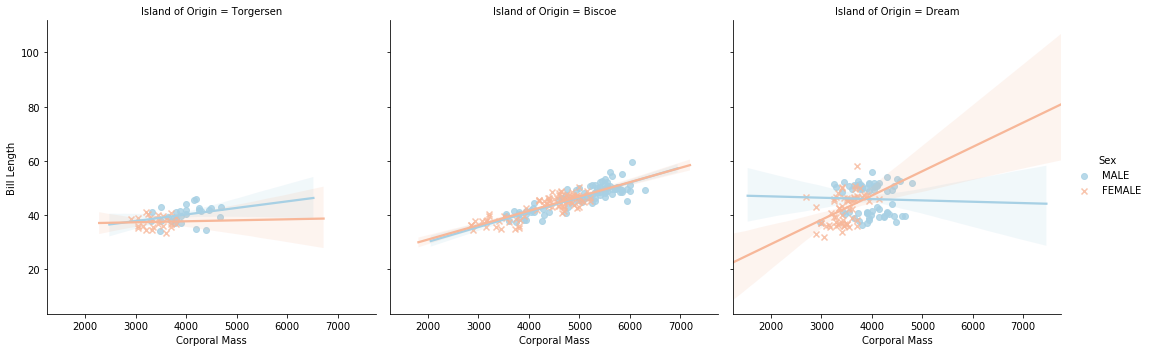

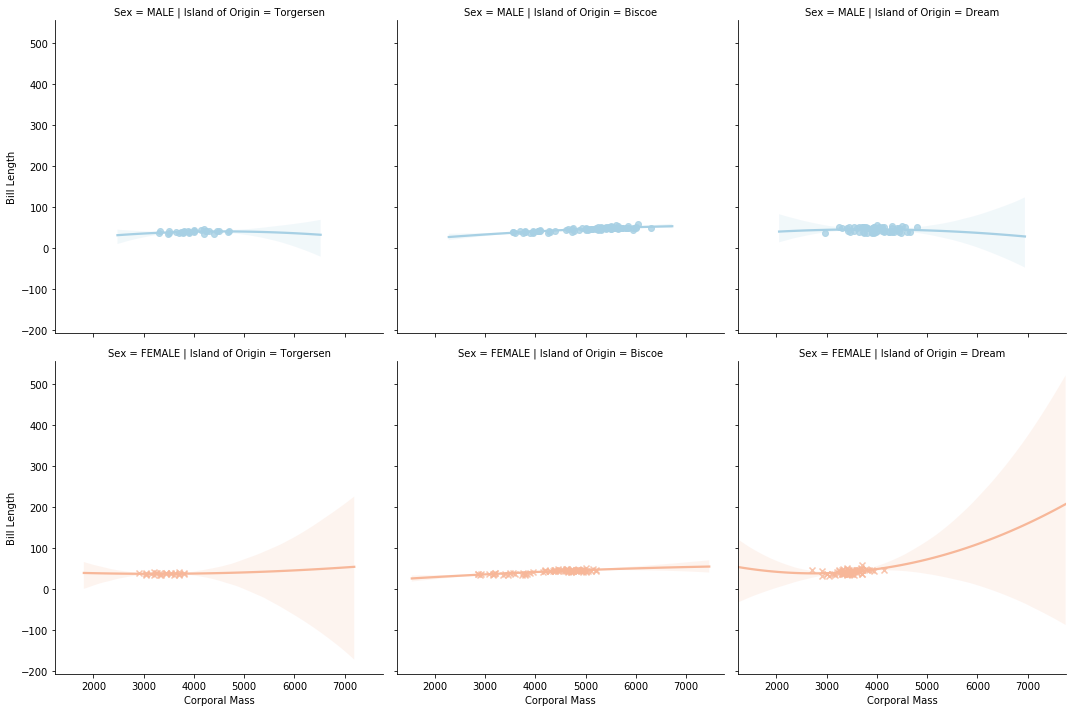

In [20]:
plt.figure(figsize=(20,20))
fig.suptitle('Penguin Physical Carateristics')
ax5 = sns.lmplot(x ="Corporal Mass", y="Bill Length", hue="Sex", col="Island of Origin", markers=["o", "x"], palette="RdBu_r",data=animalsDf)
ax6 = sns.lmplot(x ="Corporal Mass", y="Bill Length", hue="Sex", col="Island of Origin", row="Sex",order=2, markers=["o", "x"], palette="RdBu_r",data=animalsDf)

###### **Figure 6.** Distribution of Penguin Island Physical characteristics vs Gender

#### Join Plot
##### We plot of two variables with bivariate and univariate graphs.

C:\Users\jmoli\Anaconda3\lib\site-packages\seaborn\distributions.py:423: UserWarning: The following kwargs were not used by contour: 'palette'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)


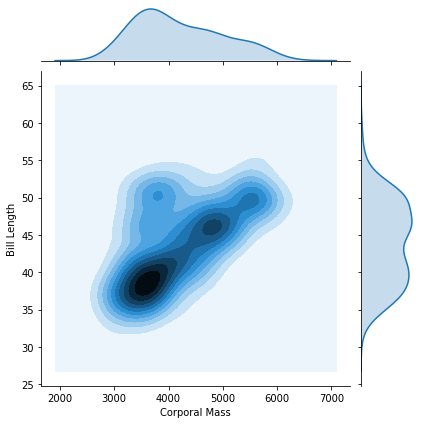

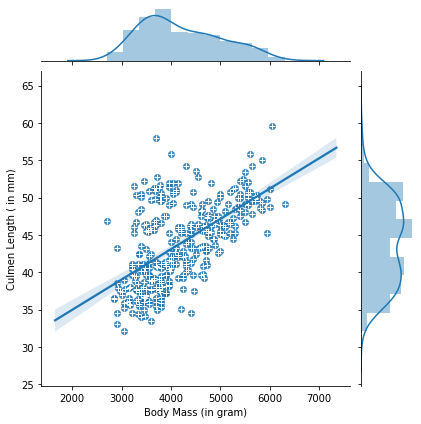

In [21]:
ax7 = sns.jointplot(x="Corporal Mass", y="Bill Length", kind="kde",data=animalsDf, palette = "CMRmap_r")
ax8 = sns.jointplot(x="Corporal Mass", y="Bill Length", data=animalsDf, kind="reg")
ax8.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
ax8.set_axis_labels("Body Mass (in gram)", "Culmen Length ( in mm)")
